# Show relative precision of parallaxes as a function of $G$ for several stellar distances

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from agabpylib.plotting.plotstyles import useagab, apply_tufte
from pygaia.errors.astrometric import parallax_uncertainty

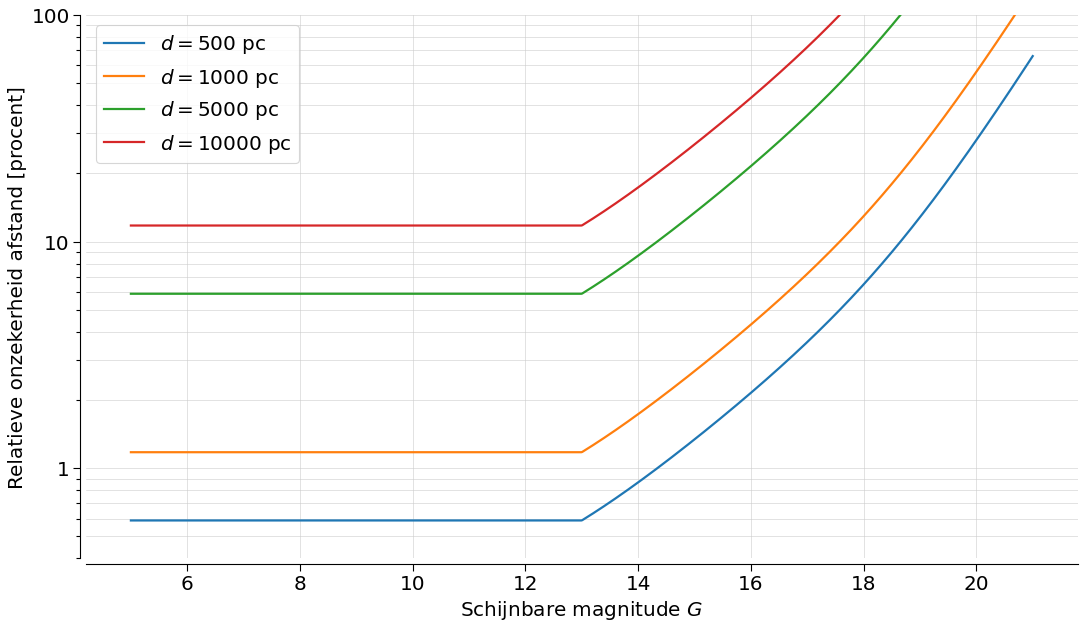

In [26]:
gmag = np.linspace(5, 21, 1000)
plx_unc = parallax_uncertainty(gmag, release='dr3')
dists = [500, 1000, 5000, 10000]
rel_plx_unc = np.zeros((len(dists), gmag.size))
for i, d in enumerate(dists):
    rel_plx_unc[i,:] = plx_unc/(1000000/d)*100

useagab()
fig, ax = plt.subplots(1, 1, figsize=(16,9))
apply_tufte(ax)

for i, d in enumerate(dists):
    ax.semilogy(gmag, rel_plx_unc[i], '-', label=rf'$d={d}$ pc')
ax.set_xlabel(r'Schijnbare magnitude $G$')
ax.set_ylabel(r'Relatieve onzekerheid afstand [procent]')
ax.set_yticks([1,10,100,1000], ['1', '10', '100', '1000'])
ax.set_ylim(0.4,100)
ax.grid(True, which='both')
ax.legend()

plt.savefig('relatieve_onzekerheid_vs_schijnbare_helderheid.pdf')
    
plt.show()

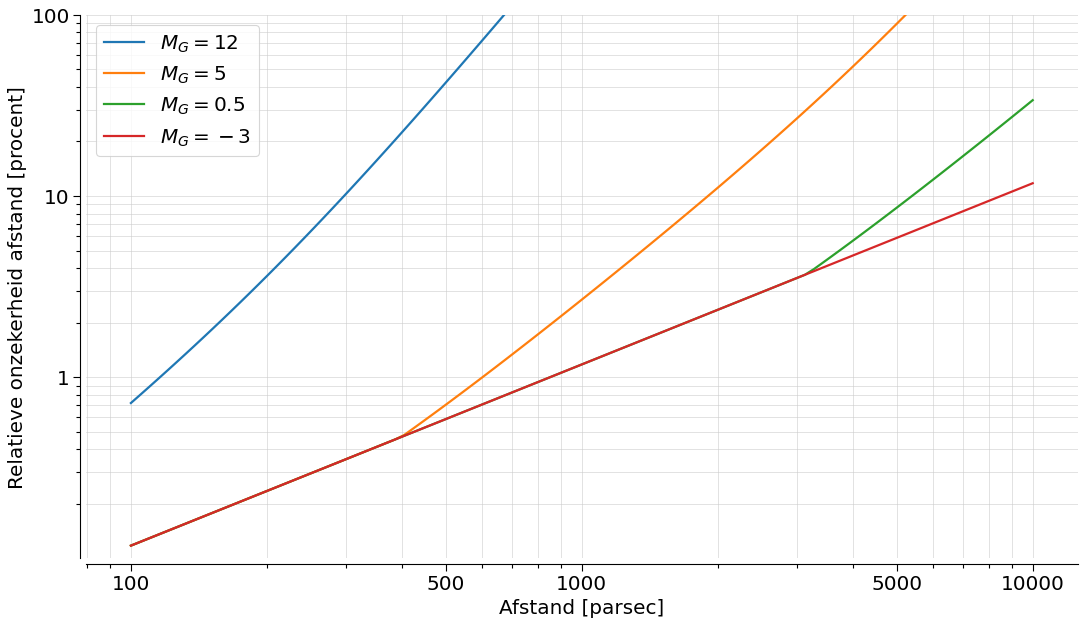

In [27]:
gabsmag = [12, 5, 0.5, -3]
afstand = np.logspace(2, 4, 100)
rel_plx_unc_B = np.zeros((len(gabsmag), afstand.size))

for i, gabs in enumerate(gabsmag):
    gmags = gabs + 5*np.log10(afstand)-5
    rel_plx_unc_B[i] = parallax_uncertainty(gmags, release='dr3')/(1000000/afstand)*100
    
fig, ax = plt.subplots(1, 1, figsize=(16,9))
apply_tufte(ax)

for i, g in enumerate(gabsmag):
    ax.loglog(afstand, rel_plx_unc_B[i], '-', label=rf'$M_G={g}$')
ax.set_xlabel(r'Afstand [parsec]')
ax.set_ylabel(r'Relatieve onzekerheid afstand [procent]')
ax.set_yticks([1,10,100,1000], ['1', '10', '100', '1000'])
ax.set_xticks([100,500,1000,5000,10000], ['100', '500', '1000', '5000', '10000'])
ax.set_ylim(0.1,100)
ax.grid(True, which='both')
ax.legend()

plt.savefig('relatieve_onzekerheid_vs_afstand.pdf')
    
plt.show()